# Hierarchical Clustering

## Hierarchical Clustering - Agglomerative

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

### Generating Random Data

We will be generating a set of data using the make_blobs class.

Input these parameters into make_blobs:
- n_samples: The total number of points equally divided among clusters.
    - Choose a number from 10-1500
- centers: The number of centers to generate, or the fixed center locations.
    - Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
- cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
    - Choose a number between 0.5-1.5

In [184]:
X, y = make_blobs(n_samples = 50, centers=[[4,4], [2,5], [-1, 4], [9,5]], cluster_std = 0.9)

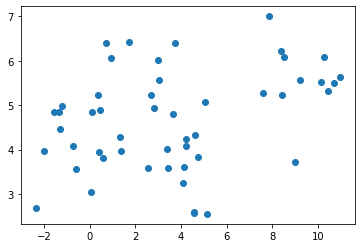

In [185]:
plt.scatter(X[:,0], X[:,1], marker='o')

#### The Agglomerative Clustering class will require two inputs:

- n_clusters: The number of clusters to form as well as the number of centroids to generate.
    - Value will be: 4
- linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    - Value will be: 'complete'
    - Note: It is recommended you try everything with 'average' as well

In [186]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage='average')
agglom

AgglomerativeClustering(linkage='average', n_clusters=4)

In [187]:
agglom.fit(X, y)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [188]:
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
x_min
x_max

X = (X - x_min) / (x_max - x_min)
X

array([[0.38805443, 0.53496667],
       [0.80655028, 0.82583938],
       [0.27675478, 0.38795046],
       [0.56407348, 0.        ],
       [0.53233748, 0.2882174 ],
       [0.4496269 , 0.50348743],
       [0.02608775, 0.31941703],
       [0.96014196, 0.62160464],
       [0.12332661, 0.34475048],
       [0.22976721, 0.86366755],
       [0.08566728, 0.54831969],
       [0.43042751, 0.32977705],
       [0.48713592, 0.23936632],
       [0.24829287, 0.78959683],
       [0.86829939, 0.67740988],
       [0.49315316, 0.34542079],
       [0.52464674, 0.39723372],
       [0.9789991 , 0.66440426],
       [0.13097369, 0.22747181],
       [0.18251292, 0.11125678],
       [0.20730493, 0.311745  ],
       [0.43356731, 0.23442184],
       [0.20579363, 0.60086933],
       [0.22225414, 0.28454904],
       [0.55736597, 0.56615816],
       [0.51987466, 0.00271679],
       [0.30586945, 0.87165613],
       [0.18432959, 0.51481179],
       [0.20979236, 0.52788366],
       [0.05829748, 0.51488863],
       [0.

<Figure size 432x288 with 0 Axes>

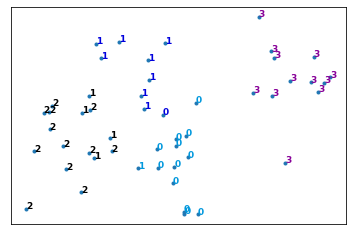

In [189]:
for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], str(y[i]), color = plt.cm.nipy_spectral(agglom.labels_[i]/10),
             fontdict={'weight':'bold', 'size':9})
plt.xticks([])
plt.yticks([])
plt.scatter(X[:,0], X[:,1], marker='.')
plt.show()


Text(0.3880544349499565, 0.5349666679777183, '1')

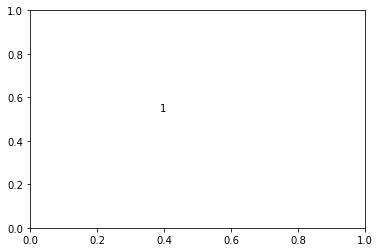

In [190]:
#only for understanding
plt.text(X[0, 0], X[0,1], str(y[0]))

## Dendrogram Associated for the Agglomerative Hierarchical Clustering

Remember that a distance matrix contains the distance from each point to every other point of a dataset .

Use the function distance_matrix, which requires two inputs. Use the Feature Matrix, X1 as both inputs and save the distance matrix to a variable called dist_matrix

Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.
(print out dist_matrix to make sure it's correct)

In [191]:
dist_matrix = distance_matrix(X, X)
dist_matrix[0:5]

array([[0.        , 0.50965253, 0.18439463, 0.56318029, 0.28583701,
        0.0691528 , 0.42128556, 0.57861064, 0.32598009, 0.36482752,
        0.30268184, 0.20951911, 0.31176386, 0.29046483, 0.50092443,
        0.21673343, 0.19397892, 0.60495429, 0.40080369, 0.47093246,
        0.28722516, 0.30397141, 0.1938096 , 0.30033102, 0.1721607 ,
        0.54833065, 0.3465749 , 0.2047194 , 0.17840273, 0.33036764,
        0.53950207, 0.06615077, 0.24046777, 0.49950954, 0.14531447,
        0.61527186, 0.56365827, 0.24439781, 0.42529972, 0.63211804,
        0.18709244, 0.30227791, 0.53897564, 0.31137345, 0.36827106,
        0.326876  , 0.63861678, 0.33844921, 0.38848794, 0.59859824],
       [0.50965253, 0.        , 0.68733542, 0.86070069, 0.60351475,
        0.48094186, 0.93036839, 0.25554302, 0.83560822, 0.57802221,
        0.77245678, 0.62253207, 0.66781448, 0.55943262, 0.16076153,
        0.57360245, 0.51300333, 0.23622001, 0.90246743, 0.94871013,
        0.78954925, 0.69920741, 0.6414983 , 0.7

Using the linkage class from hierarchy, pass in the parameters:

- The distance matrix
- 'complete' for complete linkage

In [192]:
Z = hierarchy.linkage(dist_matrix, 'complete' )

<ipython-input-192-447ccac68b23>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete' )


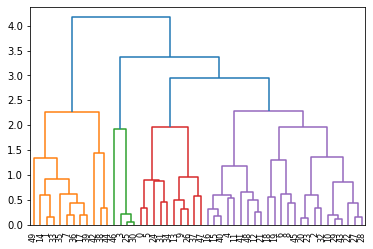

In [193]:
dendro = hierarchy.dendrogram(Z)

<ipython-input-194-252e8fb0f643>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


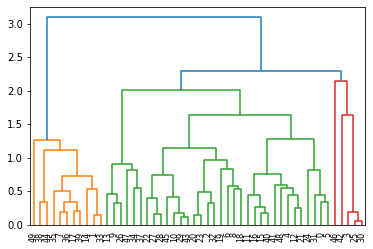

In [194]:
Z = hierarchy.linkage(dist_matrix, 'average')

dendro = hierarchy.dendrogram(Z)

## Clustering on Vehicle dataset

In [195]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv")
df.head()
df.index

RangeIndex(start=0, stop=159, step=1)

### Data Cleaning

Let's clean the dataset by dropping the rows that have null value:

In [196]:
df.size

2544

In [197]:
df[['sales', 'resale', 'type', 'price', 'engine_s',
    'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
    'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
                             'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 
                             'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,CL,14.114,18.225,0.0,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2.647,0.0
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0


In [198]:
df = df.dropna()
print(df.index)
df = df.reset_index(drop=True)
# df.head()

Int64Index([  0,   1,   3,   4,   5,   6,   8,   9,  10,  11,
            ...
            139, 140, 142, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64', length=117)


## Feature selection

Let's select our feature set:

In [199]:
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalization

Now we can normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one

In [200]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## Clustering using Scipy

In [201]:
import scipy
leng = feature_mtx.shape[0]

D = np.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
        
D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each: - single - complete - average - weighted - centroid

We use complete for our case, but feel free to change it to see how the results change.

In [202]:
import pylab 
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')
Z.shape

<ipython-input-202-b97791355e81>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


(116, 4)

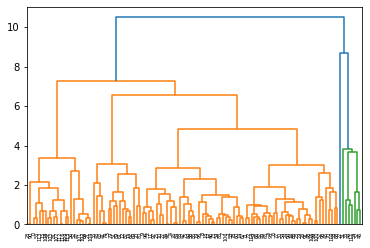

In [203]:
dendro = hierarchy.dendrogram(Z)

<ipython-input-204-298e1f53c69b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'average')


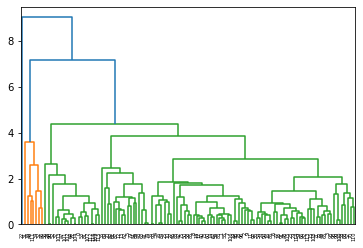

In [204]:
Z = hierarchy.linkage(D, 'average')
dendro = hierarchy.dendrogram(Z)

<ipython-input-205-4d6f7b58b765>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'weighted')


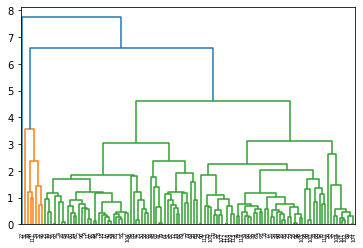

In [205]:
Z = hierarchy.linkage(D, 'weighted')
dendro = hierarchy.dendrogram(Z)

Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering. So you can use a cutting line:

In [206]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion = 'distance')
clusters

array([5, 3, 3, 5, 3, 4, 5, 3, 3, 3, 3, 3, 4, 4, 3, 5, 5, 3, 3, 3, 4, 6,
       7, 5, 5, 3, 5, 3, 5, 5, 5, 2, 1, 1, 1, 4, 3, 6, 5, 5, 3, 4, 3, 4,
       1, 3, 1, 6, 5, 5, 3, 4, 6, 5, 5, 3, 6, 5, 3, 3, 3, 4, 4, 4, 6, 5,
       5, 3, 5, 4, 5, 5, 5, 3, 4, 3, 3, 5, 3, 4, 4, 5, 5, 3, 3, 3, 5, 4,
       3, 4, 5, 5, 3, 5, 5, 3, 3, 3, 5, 5, 5, 6, 6, 6, 6, 5, 3, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 5], dtype=int32)

Also, you can determine the number of clusters directly:

In [207]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4,
       5, 4, 4, 3, 4, 3, 4, 4, 4, 2, 1, 1, 1, 3, 3, 4, 4, 4, 3, 3, 3, 3,
       1, 3, 1, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3,
       3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4], dtype=int32)

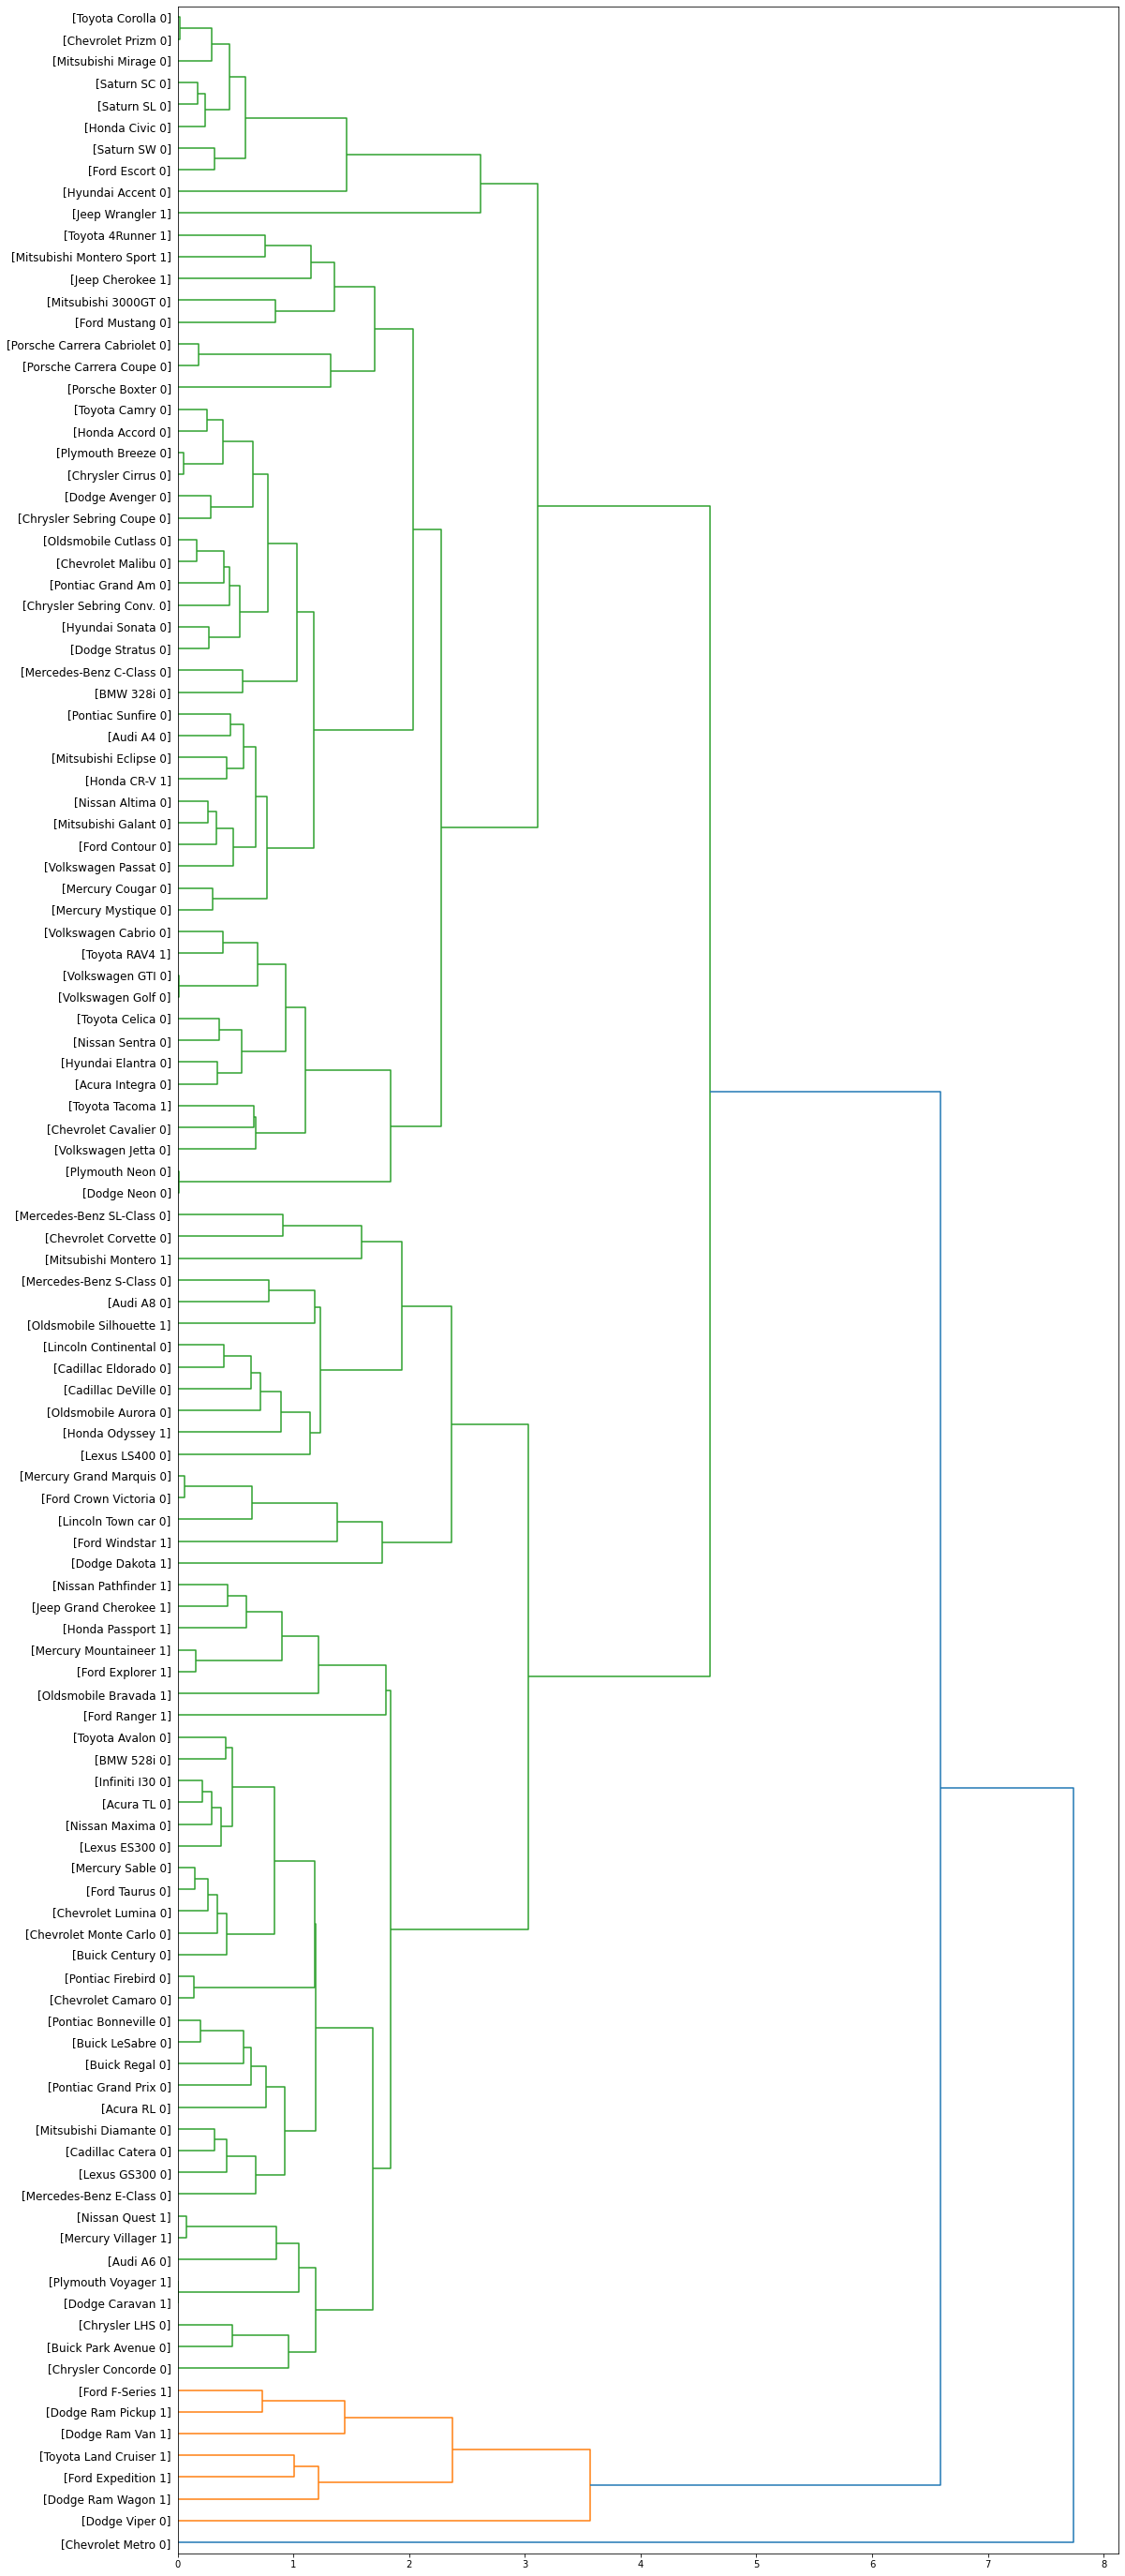

In [208]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Clustering using scikit-learn

In [209]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx, feature_mtx)
dist_matrix

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [210]:
Z = hierarchy.linkage(dist_matrix, 'complete')
Z

<ipython-input-210-3f9b3357de38>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


array([[3.60000000e+01, 9.20000000e+01, 5.30569369e-03, 2.00000000e+00],
       [2.80000000e+01, 9.00000000e+01, 1.11182906e-02, 2.00000000e+00],
       [1.12000000e+02, 1.16000000e+02, 1.19477571e-02, 2.00000000e+00],
       [2.10000000e+01, 1.04000000e+02, 2.20380776e-02, 2.00000000e+00],
       [2.60000000e+01, 9.10000000e+01, 5.08875182e-02, 2.00000000e+00],
       [4.10000000e+01, 7.40000000e+01, 5.51219450e-02, 2.00000000e+00],
       [7.60000000e+01, 8.40000000e+01, 7.30546036e-02, 2.00000000e+00],
       [1.90000000e+01, 9.50000000e+01, 1.38180998e-01, 2.00000000e+00],
       [4.00000000e+01, 7.30000000e+01, 1.46458028e-01, 2.00000000e+00],
       [4.20000000e+01, 7.50000000e+01, 1.52430867e-01, 2.00000000e+00],
       [1.60000000e+01, 8.60000000e+01, 1.65373067e-01, 2.00000000e+00],
       [1.01000000e+02, 1.02000000e+02, 1.68979409e-01, 2.00000000e+00],
       [9.90000000e+01, 1.00000000e+02, 1.78730919e-01, 2.00000000e+00],
       [1.10000000e+01, 9.70000000e+01, 1.99570647e

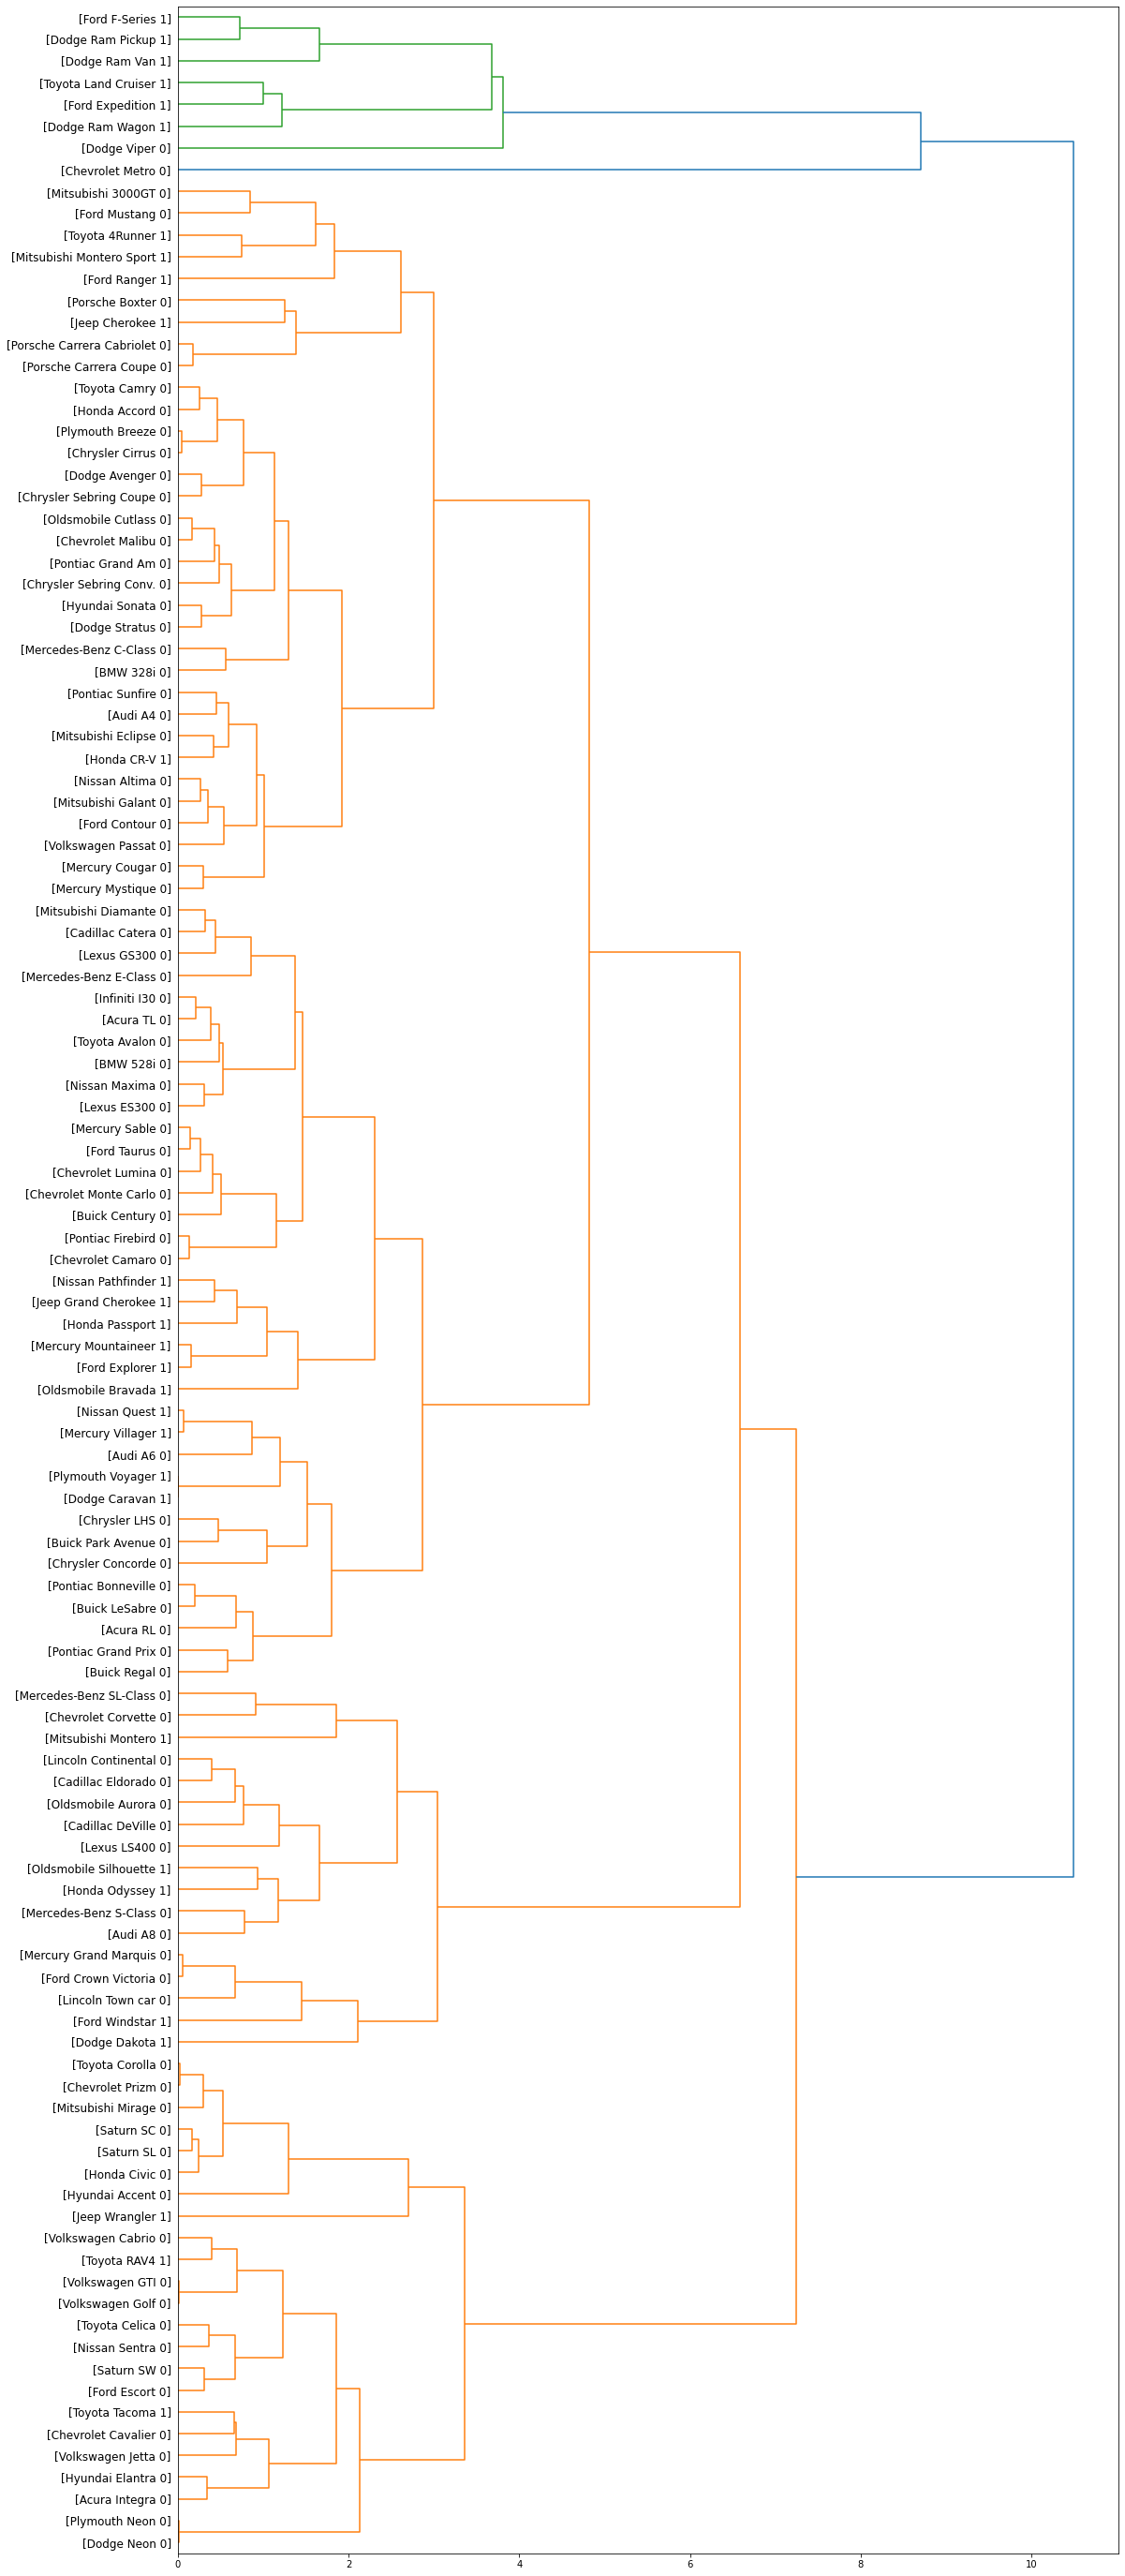

In [211]:
fig = plt.figure(figsize=(18, 50))

def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))

dendro = hierarchy.dendrogram(Z, leaf_label_func = llf, leaf_font_size = 12, orientation='right')

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [212]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage='complete')
agglom.fit(dist_matrix)


agglom.labels_

C:\Users\sspnia\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1], dtype=int64)

In [213]:
df['ClusterId'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,ClusterId
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

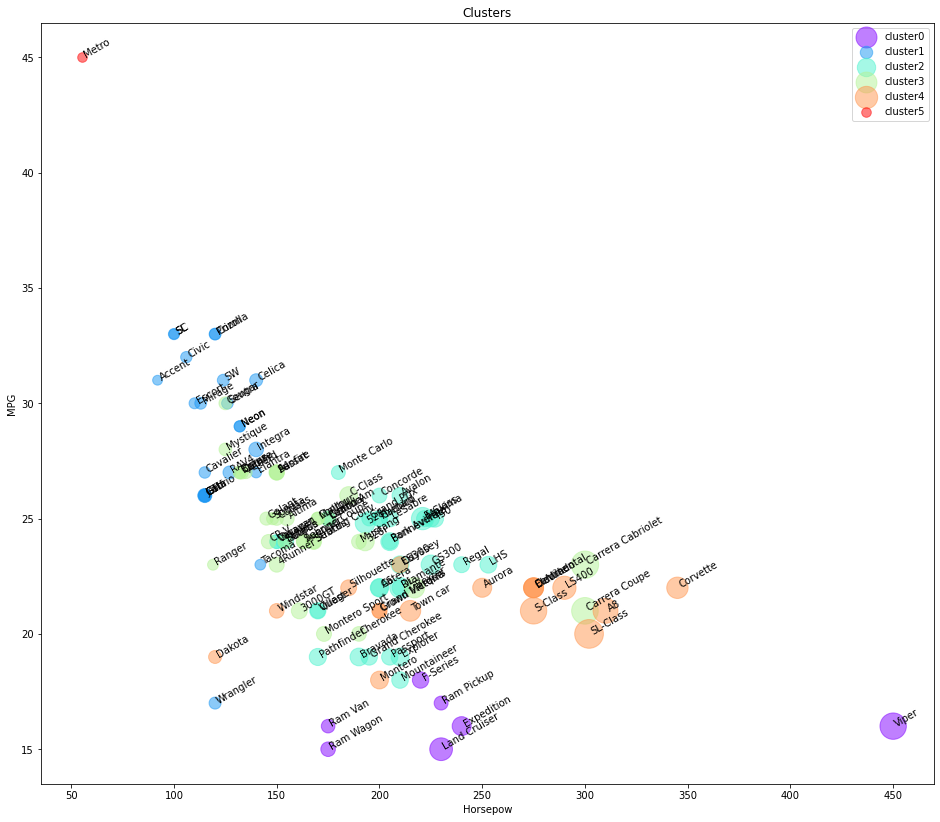

In [222]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_) + 1
# print(n_clusters)
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = df[df['ClusterId'] == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation = 30)
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label ='cluster'+str(label), alpha=0.5)

    
plt.legend()
plt.title('Clusters')
plt.xlabel('Horsepow')
plt.ylabel('MPG')
plt.show()

In [223]:
df.groupby(['ClusterId', 'type'])['ClusterId'].count()

ClusterId  type
0          0.0      1
           1.0      6
1          0.0     20
           1.0      3
2          0.0     26
           1.0     10
3          0.0     28
           1.0      5
4          0.0     12
           1.0      5
5          0.0      1
Name: ClusterId, dtype: int64

In [224]:
agg_cars = df.groupby(['ClusterId', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()

<ipython-input-224-c7f639135fd3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['ClusterId', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


In [226]:
agg_cars

horsepow  engine_s        mpg      price
ClusterId type                                            
0         0.0   450.000000  8.000000  16.000000  69.725000
          1.0   211.666667  4.483333  16.166667  29.024667
1         0.0   118.500000  1.890000  29.550000  14.226100
          1.0   129.666667  2.300000  22.333333  14.292000
2         0.0   203.615385  3.284615  24.223077  27.988692
          1.0   182.000000  3.420000  20.300000  26.120600
3         0.0   168.107143  2.557143  25.107143  24.693786
          1.0   155.600000  2.840000  22.000000  19.807000
4         0.0   267.666667  4.566667  21.416667  46.417417
          1.0   173.000000  3.180000  20.600000  24.308400
5         0.0    55.000000  1.000000  45.000000   9.235000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

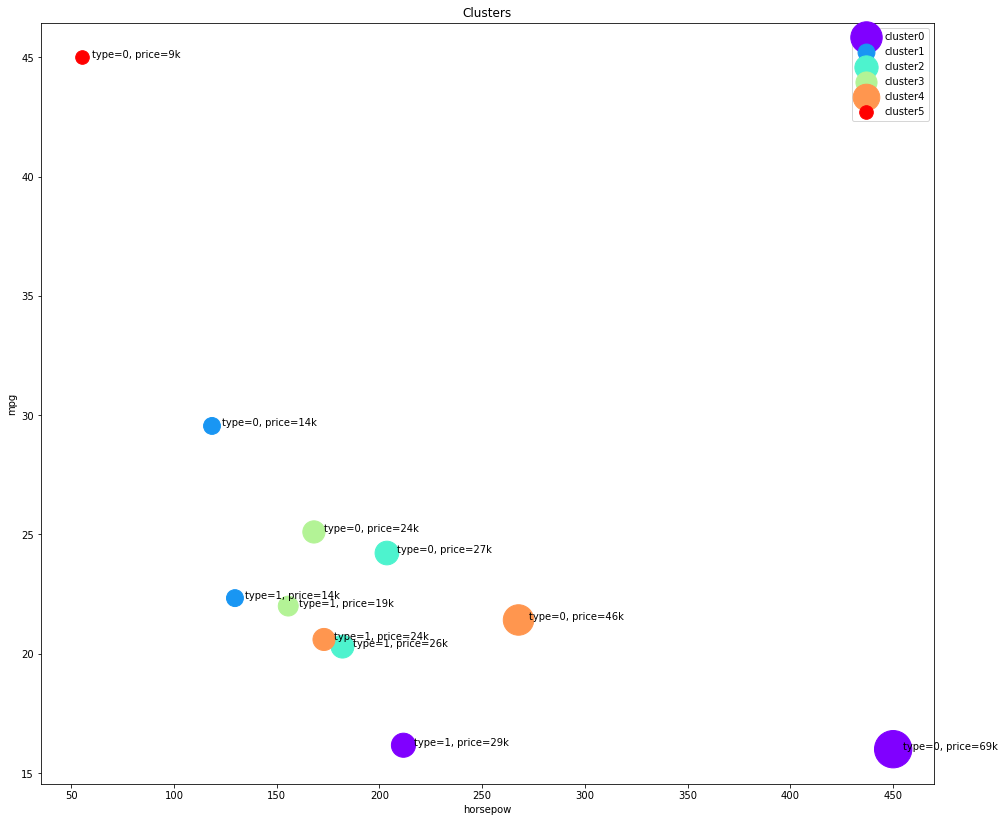

In [227]:
plt.figure(figsize=(16, 14))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label, ), ]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
